# 3 Preprocessing and modeling

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
sns.set_theme(style="darkgrid")
import matplotlib.ticker as ticker

#from statsmodels.tsa.arima_model import ARIMAResults
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")


___

## Loading data

In [2]:
df_agg_month = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/Favorita-Sales-Forecast/data/df_agg_month.csv',
                          index_col='date',parse_dates=True)

In [3]:
df_agg_month.head()

,sales,month,year
date,,,
2013-01-31,1.032762e+07,1,2013
2013-02-28,9.658960e+06,2,2013
2013-03-31,1.142850e+07,3,2013
2013-04-30,1.099346e+07,4,2013
2013-05-31,1.159770e+07,5,2013


___

## Train / Test split

In [4]:
df_agg_month.tail(10)

,sales,month,year
date,,,
2016-11-30,2.464264e+07,11,2016
2016-12-31,2.964029e+07,12,2016
2017-01-31,2.632816e+07,1,2017
2017-02-28,2.325011e+07,2,2017
2017-03-31,2.670402e+07,3,2017
2017-04-30,2.589531e+07,4,2017
2017-05-31,2.691185e+07,5,2017
2017-06-30,2.568282e+07,6,2017
2017-07-31,2.701148e+07,7,2017


We will drop July of 2017 because it's missing data, and it did show up as an anomly on previous plots.

In [5]:
df_agg_month = df_agg_month[:-1]

We will be attempting to forecast sales 6 months into the unknown future, and this will be the length of our Test set. 

In [6]:
df_train = df_agg_month[['sales']][:-6]

In [7]:
df_train.tail()

,sales
date,
2016-09-30,2.241745e+07
2016-10-31,2.403039e+07
2016-11-30,2.464264e+07
2016-12-31,2.964029e+07
2017-01-31,2.632816e+07


In [8]:
df_test = df_agg_month[['sales']][-6:]

In [9]:
df_test

,sales
date,
2017-02-28,2.325011e+07
2017-03-31,2.670402e+07
2017-04-30,2.589531e+07
2017-05-31,2.691185e+07
2017-06-30,2.568282e+07
2017-07-31,2.701148e+07


___

## Modeling

### ARIMA model

In [10]:
stepwise_fit = auto_arima(df_train['sales'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=0,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1581.575, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1572.012, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1572.910, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1580.068, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1573.652, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1573.669, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1575.662, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1571.903, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1573.816, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1573.861, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1572.658, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1575.846, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.163 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   49
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -783.952
Date:                Wed, 19 Apr 2023   AIC                           1571.903
Time:                        20:17:57   BIC                           1575.646
Sample:                    01-31-2013   HQIC                          1573.317
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4021      0.090     -4.448      0.000      -0.579      -0.225
sigma2      8.866e+12   1.05e-15   8.42e+27      0.000    8.87e+12    8.87e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                 2.13
Prob(Q):                              0.36   Prob(JB):                         0.35
Heteroskedasticity (H):               0.63   Skew:                            -0.48
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.67e+43. Standard errors may be unstable.
"""

In [11]:
# model fitting
arima_model = ARIMA(df_train['sales'],order=(1,1,0))
results = arima_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   49
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -783.952
Date:                Wed, 19 Apr 2023   AIC                           1571.903
Time:                        20:17:57   BIC                           1575.646
Sample:                    01-31-2013   HQIC                          1573.317
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4021      0.090     -4.448      0.000      -0.579      -0.225
sigma2      8.866e+12   1.05e-15   8.42e+27      0.000    8.87e+12    8.87e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                 2.13
Prob(Q):                              0.36   Prob(JB):                         0.35
Heteroskedasticity (H):               0.63   Skew:                            -0.48
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.67e+43. Standard errors may be unstable.
"""

In [12]:
# Obtain predicted values
start=len(df_train)
end=len(df_train)+len(df_test)-1
predictions_arima = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,0) Predictions')

Displaying predicted values compared to actual values:

In [13]:
for i in range(len(predictions_arima)):
    print(f"predicted={predictions_arima[i]:<11.10}, expected={df_test['sales'][i]}")

predicted=27660121.58, expected=23250112.3749368
predicted=27124477.42, expected=26704017.6908793
predicted=27339885.02, expected=25895308.489555094
predicted=27253259.54, expected=26911847.250593
predicted=27288095.7 , expected=25682822.1249936
predicted=27274086.45, expected=27011477.5658307


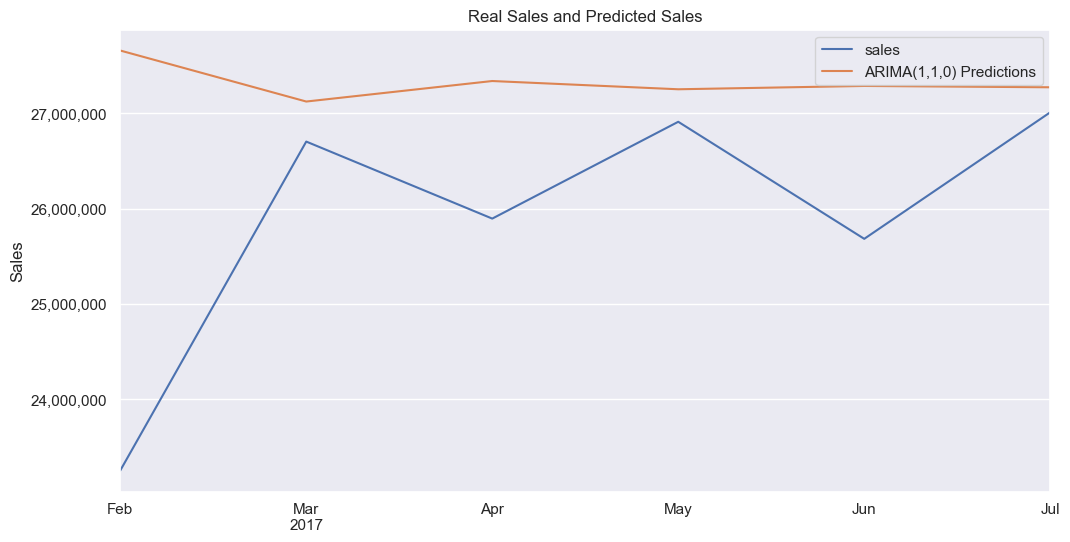

In [14]:
# Plot predictions against known values
formatter = ticker.StrMethodFormatter('{x:,.0f}')
title = 'Real Sales and Predicted Sales'
ylabel='Sales'
xlabel='' # we don't really need a label here

ax = df_test['sales'].plot(legend=True,figsize=(12,6),title=title)
predictions_arima.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

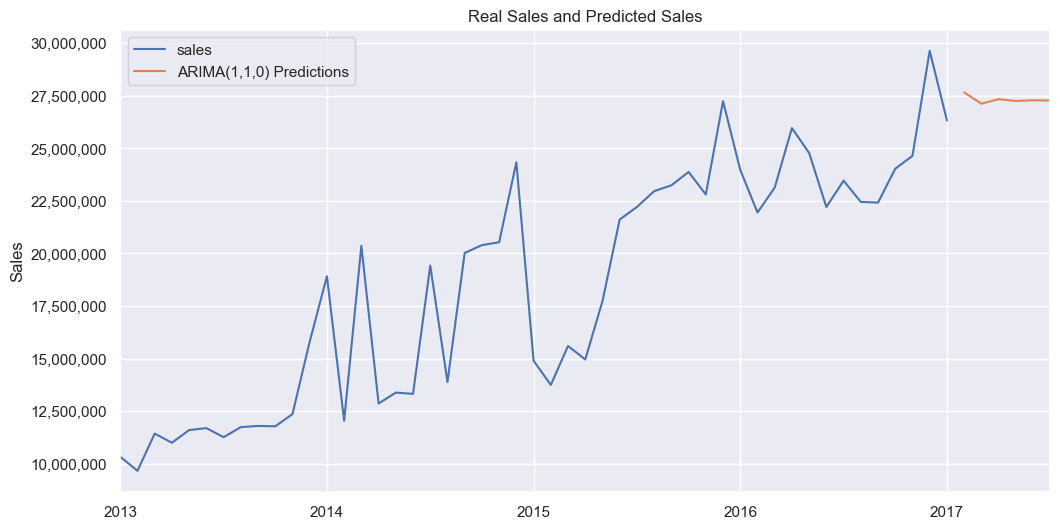

In [15]:
# Plot predictions against known values
title = 'Real Sales and Predicted Sales'
ylabel='Sales'
xlabel='' # we don't really need a label here

ax = df_train['sales'].plot(legend=True,figsize=(12,6),title=title)
predictions_arima.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

### SARIMA model

In [16]:
auto_arima(df_train['sales'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   49
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -782.940
Date:                              Wed, 19 Apr 2023   AIC                           1571.879
Time:                                      20:17:58   BIC                           1577.493
Sample:                                  01-31-2013   HQIC                          1574.001
                                       - 01-31-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3840      0.106     -3.620      0.000      -0.592      -0.176
ma.S.L12       0.2100      0.178      1.180      0.238      -0.139       0.559
sigma2      8.866e+12   2.22e-15   3.99e+27      0.000    8.87e+12    8.87e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):                 5.03
Prob(Q):                              0.37   Prob(JB):                         0.08
Heteroskedasticity (H):               0.56   Skew:                            -0.63
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.32e+43. Standard errors may be unstable.
"""

In [17]:
sarima_model = SARIMAX(df_train['sales'],order=(1,1,0),seasonal_order=(0,0,1,12))
results_sarima = sarima_model.fit()
results_sarima.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60025D+01    |proj g|=  1.85094D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   4.543D-06   1.598D+01
  F =   15.978359555661951     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                sales   No. Observations:                   49
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -782.940
Date:                              Wed, 19 Apr 2023   AIC                           1571.879
Time:                                      20:17:58   BIC                           1577.493
Sample:                                  01-31-2013   HQIC                          1574.001
                                       - 01-31-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3840      0.106     -3.620      0.000      -0.592      -0.176
ma.S.L12       0.2100      0.178      1.180      0.238      -0.139       0.559
sigma2      8.866e+12   2.22e-15   3.99e+27      0.000    8.87e+12    8.87e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):                 5.03
Prob(Q):                              0.37   Prob(JB):                         0.08
Heteroskedasticity (H):               0.56   Skew:                            -0.63
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.32e+43. Standard errors may be unstable.
"""

In [18]:
# Obtain predicted values
start=len(df_train)
end=len(df_train)+len(df_test)-1
sarima_predictions = results.predict(start=start, end=end, dynamic=False,
                              typ='levels').rename('SARIMA(1,1,0)(0,0,1,12) Predictions')

In [19]:
# Compare predictions to expected values
for i in range(len(sarima_predictions)):
    print(f"predicted={sarima_predictions[i]:<11.10}, expected={df_test['sales'][i]}")

predicted=27660121.58, expected=23250112.3749368
predicted=27124477.42, expected=26704017.6908793
predicted=27339885.02, expected=25895308.489555094
predicted=27253259.54, expected=26911847.250593
predicted=27288095.7 , expected=25682822.1249936
predicted=27274086.45, expected=27011477.5658307


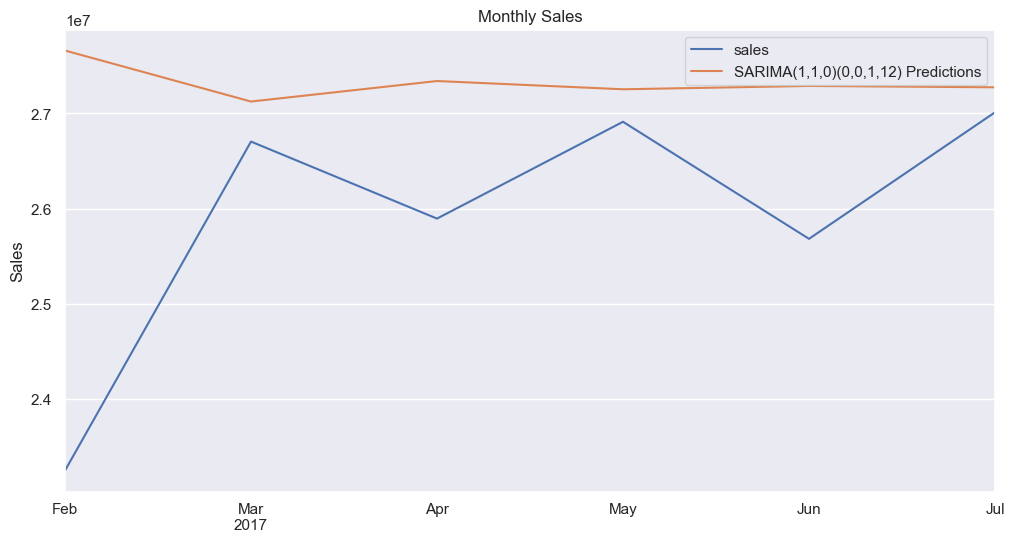

In [20]:
# Plot predictions against known values
title = 'Monthly Sales'
ylabel='Sales'
xlabel=''

ax = df_test['sales'].plot(legend=True,figsize=(12,6),title=title)
sarima_predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

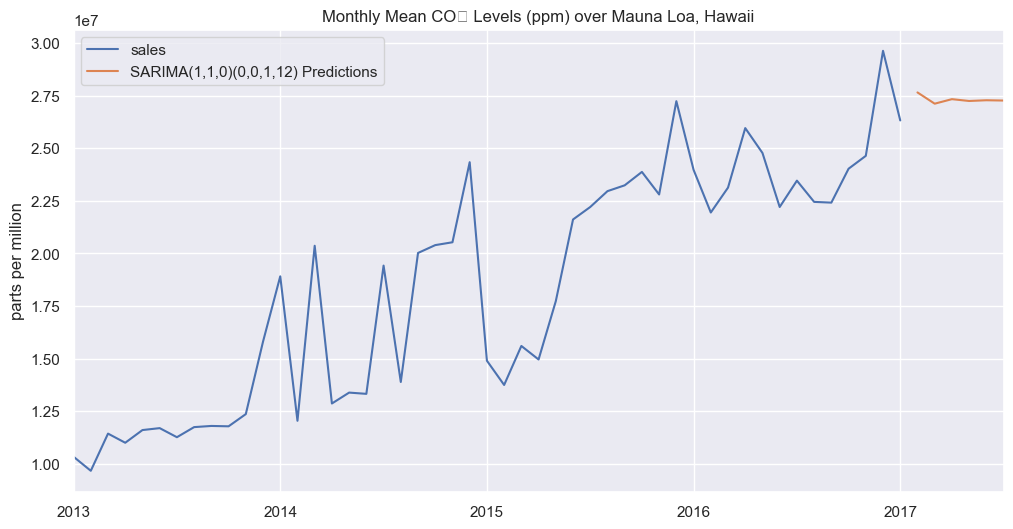

In [21]:
# Plot predictions against known values
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = df_train['sales'].plot(legend=True,figsize=(12,6),title=title)
sarima_predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

###  Prophet model